In [16]:
library(survival)
library(MASS)
library(openxlsx)
library(corrplot)
library(rworldmap)
library(RColorBrewer)
library(psych)

In [48]:
# install.packages("glmmML")


The downloaded binary packages are in
	/var/folders/jb/jxztdls55vncm84hp50zf9n40000gn/T//RtmpJueKN4/downloaded_packages


In [49]:
library(glmmML)

Warning message:
“package ‘glmmML’ was built under R version 3.6.2”


In [3]:
df <- read.xlsx("../../data/data_covid_fix_name.xlsx")
df <- na.omit(df)
head(df)

,country,pop,urb,gdp,dist,hf,pf,ef,date_first,detection,status,cumul,air
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Albania,2866376,60.319,13364.155,6996524,7.84,8.005411,7.67,70,74.3,1,108641,303.14
2,Algeria,42228429,72.629,15481.788,9108277,4.99,5.201489,4.77,58,12.0,1,80272,6442.44
3,Angola,30809762,65.514,6452.355,10490120,5.40,5.979936,4.83,83,17.9,1,303691,76.94
4,Argentina,44494502,91.870,20610.569,19025624,6.86,8.044600,5.67,65,74.9,1,92122,1516.63
6,Australia,24992369,86.012,51663.365,7608913,8.62,9.160533,8.07,26,97.3,1,1347,75667.65
7,Austria,8847037,58.297,55454.689,7103537,8.48,9.245685,7.71,58,73.2,1,80272,12935.50


In [18]:
X = df[,c(9, 2,3,4,5,6,10,13)]
X = log(X)

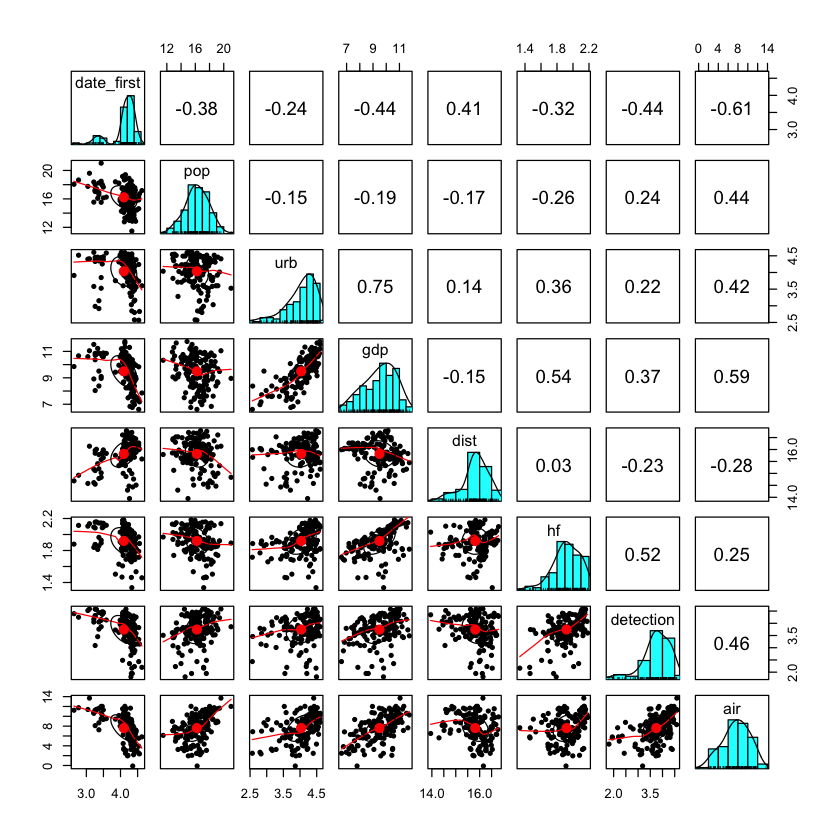

In [19]:
pairs.panels(X)

In [43]:
# 個体差のためのindexを作成
1:nrow(X)

X["index"] = seq(1, nrow(X), by = 1)

[1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
[109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
[127] 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
[145] 145 146 147 148 149 150

# 一般化線形混合モデル

In [50]:
# model <- glmer(date_first ~ hf + pop + gdp+ urb + dist + air + detection + (1| index) , data = X, family=gaussian )

In [53]:
model <- glmmML(date_first ~ hf + pop + gdp+ urb + dist + air + detection , data = X, cluster=index, family=poisson)

Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 4.248495”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 4.060443”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 4.418841”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 4.174387”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 3.258097”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 4.060443”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 4.110874”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 4.343805”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 4.025352”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 4.248495”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 4.094345”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 3.583519”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 4.442651”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 4.

Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 4.077537”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 4.158883”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 4.330733”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 4.158883”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 4.158883”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 4.219508”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 4.330733”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 4.532599”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 3.218876”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 4.219508”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 4.189655”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 4.204693”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 3.044522”
Warning message in dpois(y, mu, log = TRUE):
“non-integer x = 3.

In [56]:
summary(model)


Call:  glmmML(formula = date_first ~ hf + pop + gdp + urb + dist + air +      detection, family = poisson, data = X, cluster = index) 


                  coef se(coef)         z Pr(>|z|)
(Intercept)  1.4963385  1.59991  0.935266    0.350
hf          -0.1519652  0.35039 -0.433706    0.665
pop         -0.0210064  0.03669 -0.572558    0.567
gdp         -0.0166387  0.07273 -0.228776    0.819
urb          0.0002564  0.14887  0.001722    0.999
dist         0.0467911  0.08666  0.539955    0.589
air         -0.0066751  0.02574 -0.259330    0.795
detection    0.0030484  0.09514  0.032042    0.974

Scale parameter in mixing distribution:  8.796e-11 gaussian 
Std. Error:                              0.04068 

        LR p-value for H_0: sigma = 0:  0.5 

Residual deviance: 2.708 on 141 degrees of freedom 	AIC: 20.71 
